In [111]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 

%matplotlib inline 

In [112]:
# In 2016, Massachusetts transitioned to a surveillance method that relies primarily on laboratory reports. This method does not currently align with the national surveillance case definition as set by the Council of State and Territorial Epidemiologists (CSTE). Therefore, information on most Lyme disease cases occurring in Massachusetts is not sent to CDC. Please contact the MA Department of Public HealthExternal for case numbers.

In [113]:
#  Although concentrated in historically high-incidence areas, the geographic distribution is expanding into neighboring states. The trend of stable to decreasing case counts in many states with high incidence could be a result of multiple factors, including actual stabilization of disease incidence or artifact due to modifications in reporting practices employed by some states to curtail the resource burden associated with Lyme disease surveillance.

In [114]:
## this is very fishy, the two cases where they have decreased the incidence of Lyme used to have the highest rates. 

In [115]:
df = pd.read_csv('./lyme_weather_deer.csv')

(2000, 2015.5)

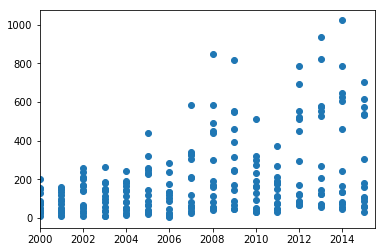

In [121]:
plt.scatter(df[df['Stname'].str.contains('Massa')]['year'],df[df['Stname'].str.contains('Massa')]['Cases'])
plt.xlim(2000,2015.5)

In [127]:
df.columns

Index(['Unnamed: 0', 'Ctyname', 'Stname', 'STCODE', 'CTYCODE', 'Cases',
       'CENSUSAREA', 'geometry', 'long_lat', 'ST', 'DIV', 'EL_x', 'YR',
       'JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN', 'MAY_PCPN', 'JUN_PCPN',
       'JUL_PCPN', 'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN', 'NOV_PCPN', 'DEC_PCPN',
       'EL_y', 'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC', 'APR_TMPC', 'MAY_TMPC',
       'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC', 'OCT_TMPC', 'NOV_TMPC',
       'DEC_TMPC', 'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN', 'APR_TMIN', 'MAY_TMIN',
       'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN', 'OCT_TMIN', 'NOV_TMIN',
       'DEC_TMIN', 'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX', 'APR_TMAX', 'MAY_TMAX',
       'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX', 'OCT_TMAX', 'NOV_TMAX',
       'DEC_TMAX', 'ST_new', 'year'],
      dtype='object')

In [128]:
df_temp = df[df['Stname'].str.contains('Massa')]

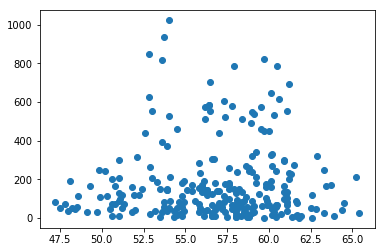

In [138]:
plt.scatter(df_temp['JUN_TMIN'],df_temp['Cases'])


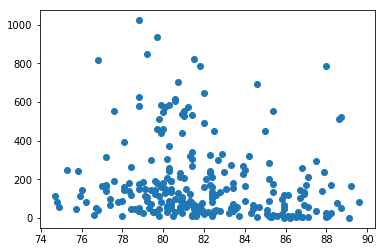

In [139]:
plt.scatter(df_temp['JUN_TMAX'],df_temp['Cases'])


In [145]:
df.columns

Index(['Unnamed: 0', 'Ctyname', 'Stname', 'STCODE', 'CTYCODE', 'Cases',
       'CENSUSAREA', 'geometry', 'long_lat', 'ST', 'DIV', 'EL_x', 'YR',
       'JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN', 'MAY_PCPN', 'JUN_PCPN',
       'JUL_PCPN', 'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN', 'NOV_PCPN', 'DEC_PCPN',
       'EL_y', 'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC', 'APR_TMPC', 'MAY_TMPC',
       'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC', 'OCT_TMPC', 'NOV_TMPC',
       'DEC_TMPC', 'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN', 'APR_TMIN', 'MAY_TMIN',
       'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN', 'OCT_TMIN', 'NOV_TMIN',
       'DEC_TMIN', 'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX', 'APR_TMAX', 'MAY_TMAX',
       'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX', 'OCT_TMAX', 'NOV_TMAX',
       'DEC_TMAX', 'ST_new', 'year'],
      dtype='object')

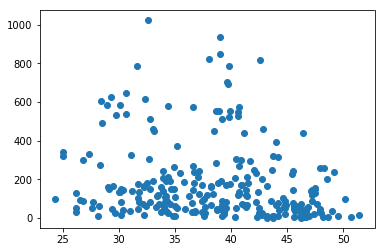

In [143]:
plt.scatter(df_temp['deer,df_temp['Cases'])


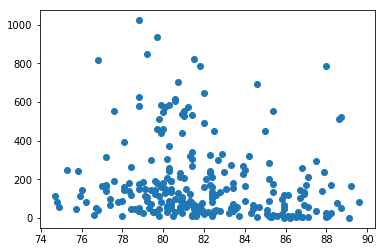

In [132]:
plt.scatter(df_temp['JUN_TMA'],df_temp['Cases'])


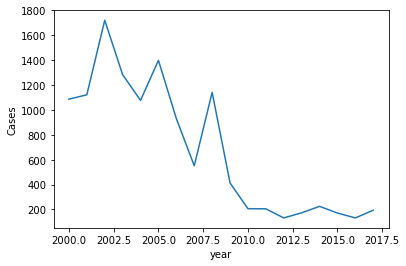

In [122]:
ax = sns.lineplot(x="year", y="Cases",
                  data=df[df['Ctyname'].str.contains('Dutch')])

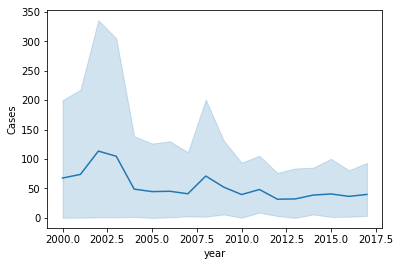

In [123]:
ax = sns.lineplot(x="year", y="Cases",
                  data=df[df['Ctyname'].str.contains('Columbia')])

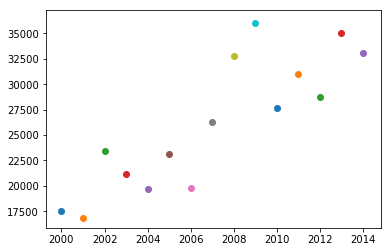

In [124]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(year, sum(df[df['year']==year]['Cases']))

In [ ]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(, sum(df[df['year']==year]['Cases']))

In [ ]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(year, sum(df[df['year']==year]['Cases']))

In [ ]:
df_num_corr = df_num.corr()['cases'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
## remove outliers 

In [ ]:
## 

the distribution of lyme cases over the years in different counties -- histogram 
cases_county[] vs year []
cases_county[] vs mean temp + p[]
